# T4

In [1]:
import numpy as np
import scipy.stats as sps
from scipy.special import erfinv
import matplotlib.pyplot as plt

from matplotlib import ticker

## Генерация выборки

В качестве параметра $\theta$ возьмем $5$

In [2]:
theta = 5


class UniformGenerator(sps.rv_continuous):
        def _pdf(self, x):
            return 1 / theta

uniform = UniformGenerator(a=theta, b=2*theta, name='uniform')

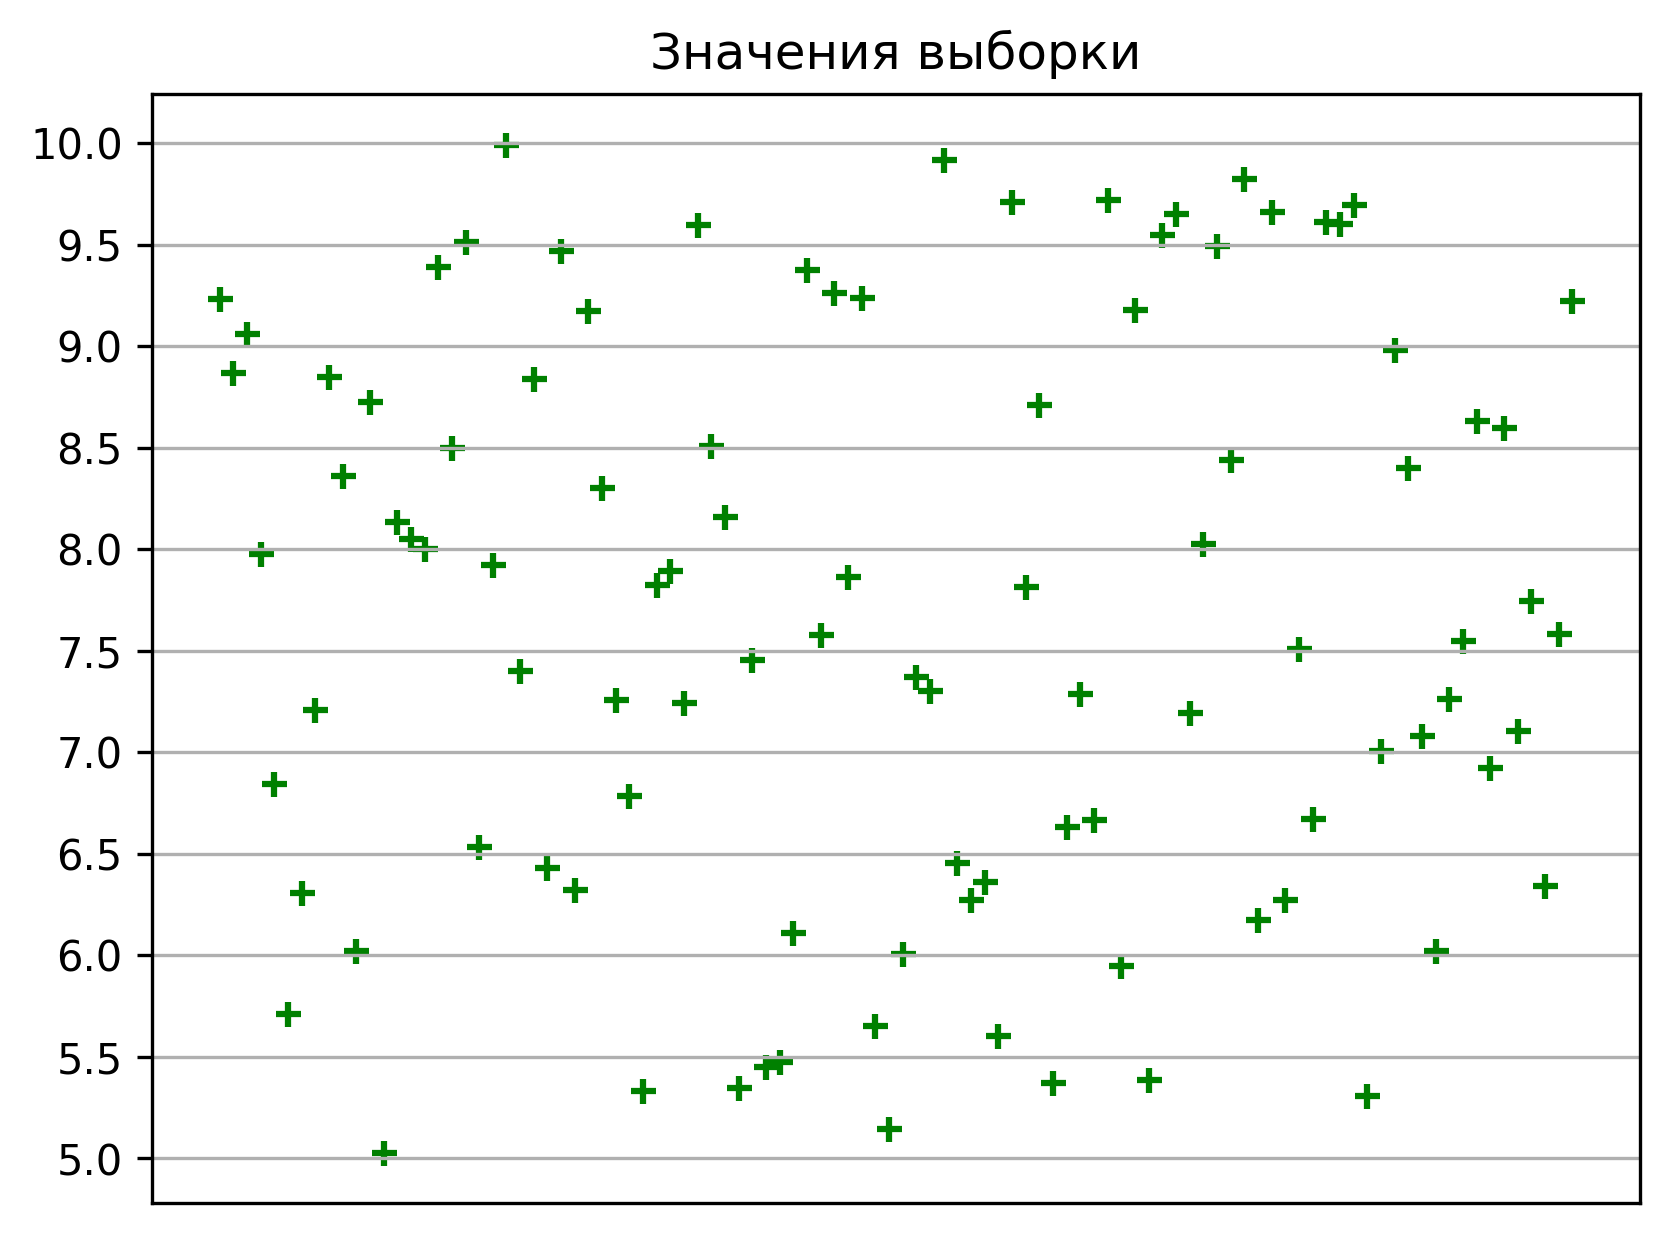

In [3]:
sample = uniform.rvs(size=100)

X = np.arange(1, 101)
Y = sample

fig, ax = plt.subplots(dpi=300)

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.set_xticks([])

ax.grid(True)

ax.scatter(X, Y, marker='+', color='green')
ax.set_title('Значения выборки')

plt.style.use("default")
plt.show()

## Точный доверительный интервал

In [4]:
x_max = np.max(sample)
n = len(sample)

betta = 0.95

t1 = ((1 - betta) / 2) ** (1 / n) + 1
t2 = ((1 + betta) / 2) ** (1 / n) + 1

h1 = x_max / t2
h2 = x_max / t1

print(f'Точный доверительный интервал: ({h1}, {h2}). Его длина: {h2 - h1}')

Точный доверительный интервал: (4.997103873217419, 5.088617828650988). Его длина: 0.09151395543356866


## Асимптотический доверительный интервал

In [5]:
x_mean = np.mean(sample)
x_square_mean = np.mean(sample ** 2)

equal_part = np.sqrt(2) * erfinv(-betta) * (2 / 3) * np.sqrt(x_square_mean - x_mean ** 2) / np.sqrt(n)
asymptotic_h2 = -equal_part + (2 / 3) * x_mean
asymptotic_h1 = equal_part + (2 / 3) * x_mean

print(f'Точный доверительный интервал: ({asymptotic_h1}, {asymptotic_h2}). Его длина: {asymptotic_h2 - asymptotic_h1}')

Точный доверительный интервал: (4.933332276238989, 5.300880142812186). Его длина: 0.36754786657319727


### Сравнение первых двух интервалов

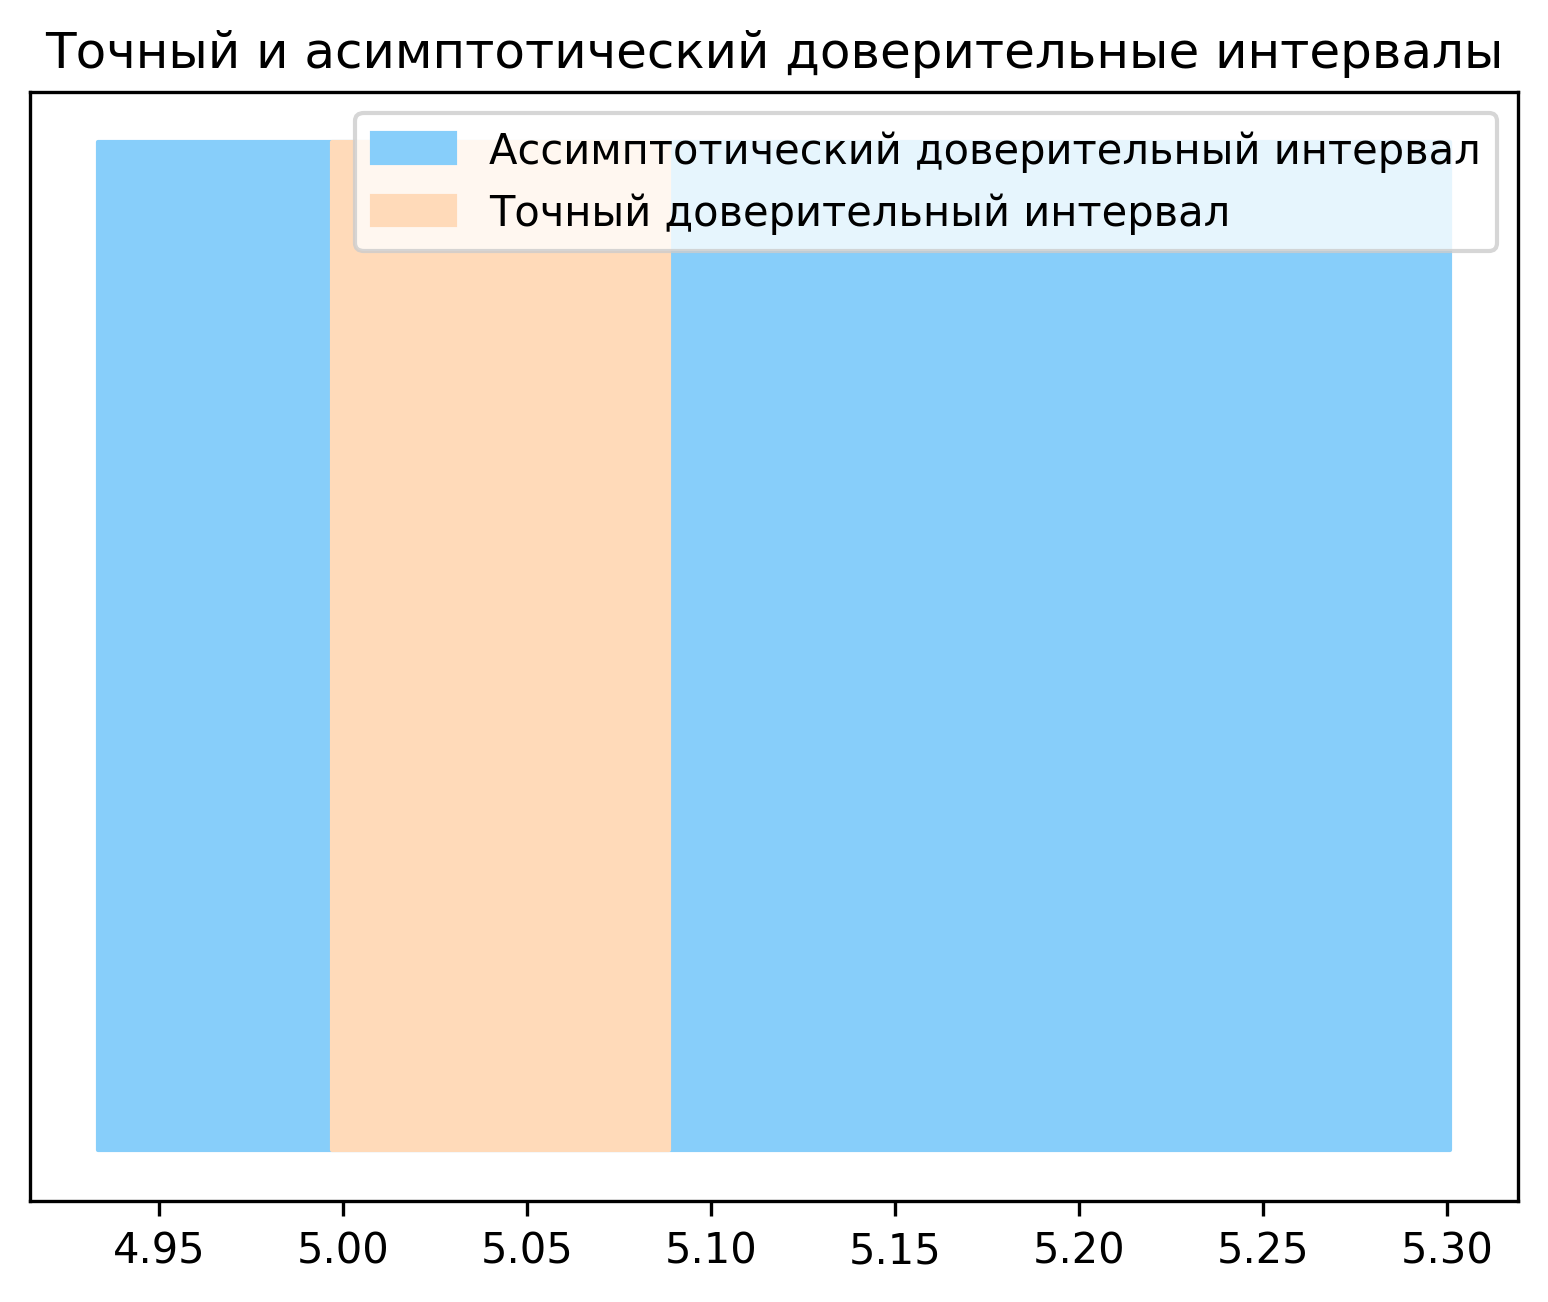

In [6]:
fig1, ax1 = plt.subplots(dpi=300)

ax1.fill_betweenx([0, 1], [asymptotic_h1], [asymptotic_h2], color='lightskyblue', label='Ассимптотический доверительный интервал')
ax1.fill_betweenx([0, 1], [h1], [h2], color='peachpuff', label='Точный доверительный интервал')
ax1.set_yticks([])

ax1.set_title("Точный и асимптотический доверительные интервалы")
ax1.legend()

plt.show()

## Вооtstrap

### Параметрический bootstrap

In [7]:
parametric_theta = np.max(sample) / 2

class ParametricUniformGenerator(sps.rv_continuous):
    def _pdf(self, x):
        return 1 / parametric_theta

parametric_uniform = ParametricUniformGenerator(a=parametric_theta, b=2*parametric_theta, name='parametric_uniform')

In [8]:
N = 50000
parametric_samples = np.array([
    parametric_uniform.rvs(size=len(sample)) for _ in range(N)
])

deltas = []
for parametric_sample in parametric_samples:
    deltas.append(np.mean(parametric_sample) * (2 / 3))
deltas = np.sort(deltas)
k1 = int((1 - betta) * N / 2) - 1
k2 = int((1 + betta) * N / 2) - 1

parametric_h1 = deltas[k1]
parametric_h2 = deltas[k2]
print(f"Доверительный интервал: ({parametric_h1}, {parametric_h2}). Длина: {parametric_h2 - parametric_h1}")

Доверительный интервал: (4.806660305987718, 5.18336689276034). Длина: 0.37670658677262203


### Непараметрический bootstrap

In [9]:
nonparametric_samples = np.array([
    np.random.choice(sample, 100) for _ in range(1000)
])

theta_ = (2 / 3) * np.mean(sample)
nonparametric_thetas = []

for nonparametric_sample in nonparametric_samples:
    nonparametric_thetas.append((2 / 3) * np.mean(nonparametric_sample) - theta_)

nonparametric_thetas.sort()
nonparametric_h1 = -nonparametric_thetas[974] + theta_
nonparametric_h2 = -nonparametric_thetas[24] + theta_
print(f"Доверительный интервал: ({nonparametric_h1}, {nonparametric_h2}). Длина: {nonparametric_h2 - nonparametric_h1}")

Доверительный интервал: (4.936989158979983, 5.293133002001182). Длина: 0.35614384302119984


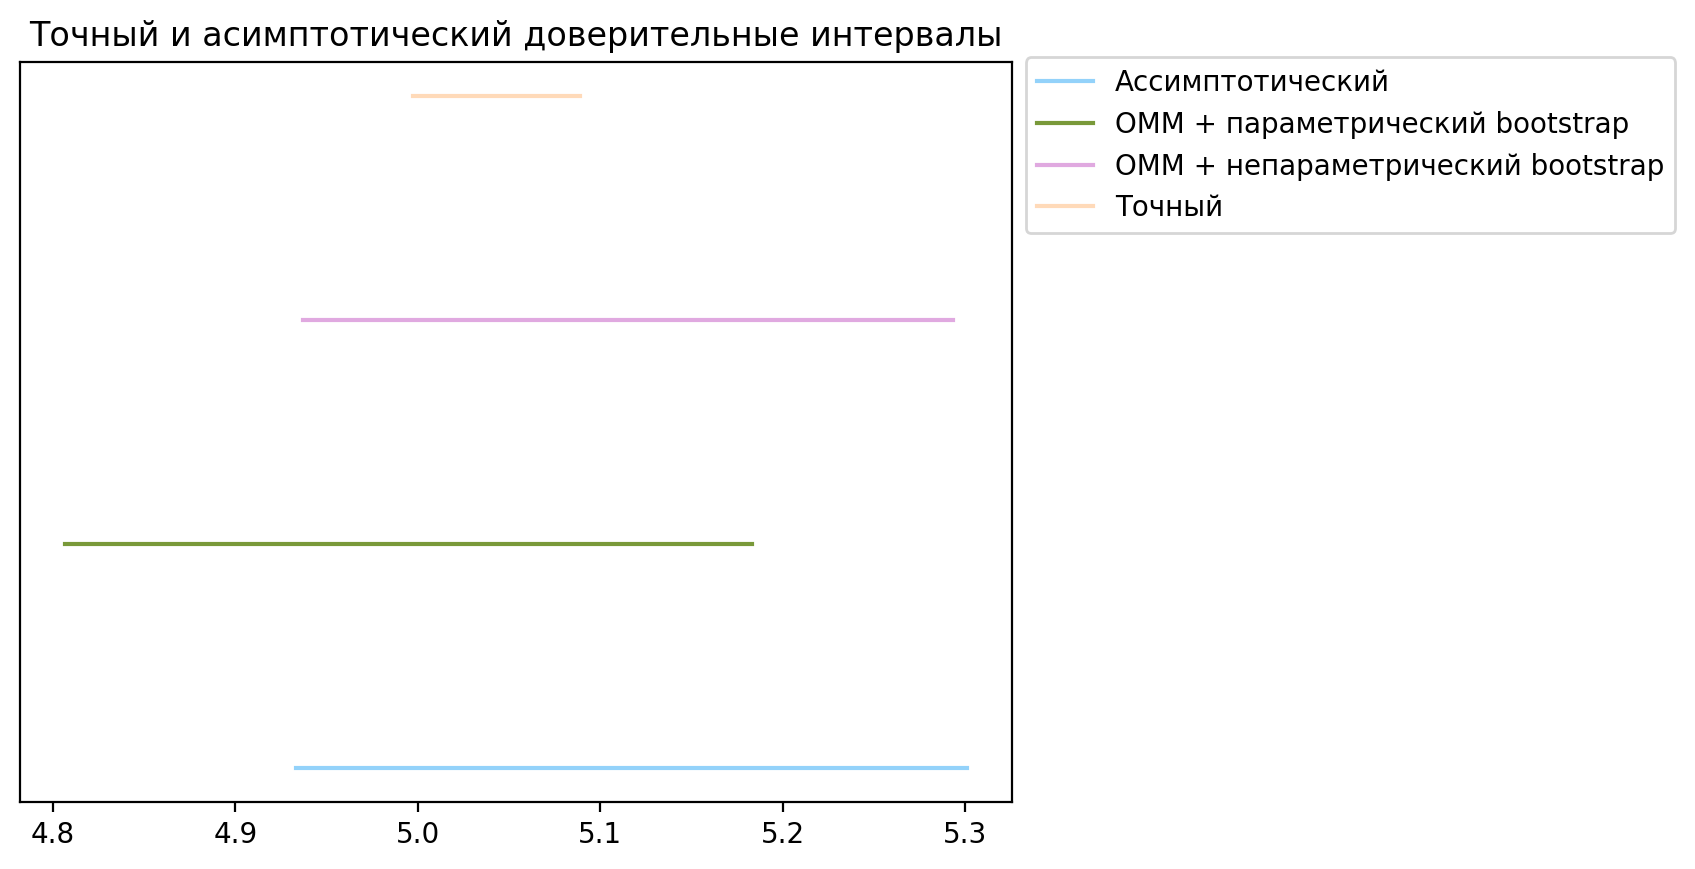

In [28]:
fig2, ax2 = plt.subplots(dpi=200)

ax2.plot([asymptotic_h1, asymptotic_h2], [1, 1], color='lightskyblue', label='Ассимптотический', alpha=0.9)
ax2.plot([parametric_h1, parametric_h2], [2, 2], color='olivedrab', label='ОММ + параметрический bootstrap', alpha=0.9)
ax2.plot([nonparametric_h1, nonparametric_h2], [3, 3], color='plum',  label='ОММ + непараметрический bootstrap', alpha=0.9)
ax2.plot([h1, h2], [4, 4], color='peachpuff', label='Точный')

ax2.set_yticks([])

ax2.set_title("Точный и асимптотический доверительные интервалы")
ax2.legend(loc='lower left', bbox_to_anchor=(1, 0.75))

plt.show()